# POSTTEST 5 
  ## Nama : Hendy Saputra
  ## Nim  : 2109106120
  ## Kelas: Informatika C'21

### Library yang di gunakan 

In [107]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

### Menampilkan data

In [108]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### melakukan encoder untuk data kategorikal dan number

In [109]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
# # Menggunakan one-hot encoding untuk kolom "gender"
# df = pd.get_dummies(df, columns=['gender'], prefix=['gender'])

# Terapkan LabelEncoder pada atribut "smoking_history"
df['gender'] = label_encoder.fit_transform(df['gender'])



# Terapkan LabelEncoder pada atribut "smoking_history"
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Penanganan nilai yang hilang (jika ada)
# df = df.dropna() # atau df = df.fillna(value)

# Simpan dataset yang sudah dimodifikasi ke file CSV
df.to_csv('modified_diabetes_dataset.csv', index=False)

df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


## Supervised learning

### Mengimplementasi metode SVM dengan x gender	age	hypertension	heart_disease	smoking_history	bmi	HbA1c_level	blood_glucose_level	diabetes dan targetnya smoking_history 

In [110]:

column = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',	'diabetes']
x = df[column]
y = df['smoking_history']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)


#### untuk implementasi linear Regression

In [112]:
svc = SVC(kernel= 'linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)


#### membuat hasil prediksi dengan Confusion Matrix dan menampilkan Hasilnya

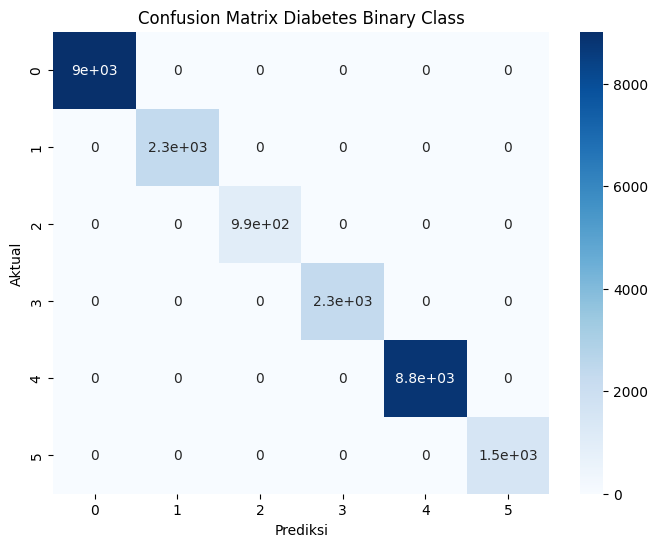

Confusion Matrix:
[[9015    0    0    0    0    0]
 [   0 2341    0    0    0    0]
 [   0    0  994    0    0    0]
 [   0    0    0 2300    0    0]
 [   0    0    0    0 8813    0]
 [   0    0    0    0    0 1537]]
Akurasi model SVM: 1.0
Presisi: 1.0
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9015
           1       1.00      1.00      1.00      2341
           2       1.00      1.00      1.00       994
           3       1.00      1.00      1.00      2300
           4       1.00      1.00      1.00      8813
           5       1.00      1.00      1.00      1537

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan matriks kebingungan sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Diabetes Binary Class')
plt.show()

# Menghitung presisi dan recall
precision = precision_score(y_test, y_pred, average='macro')  # Ganti 'macro' sesuai kebutuhan Anda
recall = recall_score(y_test, y_pred, average='macro')  # Ganti 'macro' sesuai kebutuhan Anda
# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)


# Menampilkan hasil
print("Confusion Matrix:")
print(conf_matrix)
print(f'Akurasi model SVM: {accuracy}')
print(f'Presisi: {precision}')
print(f'Recall: {recall}')
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

## menampilkan plot hasil prediksi

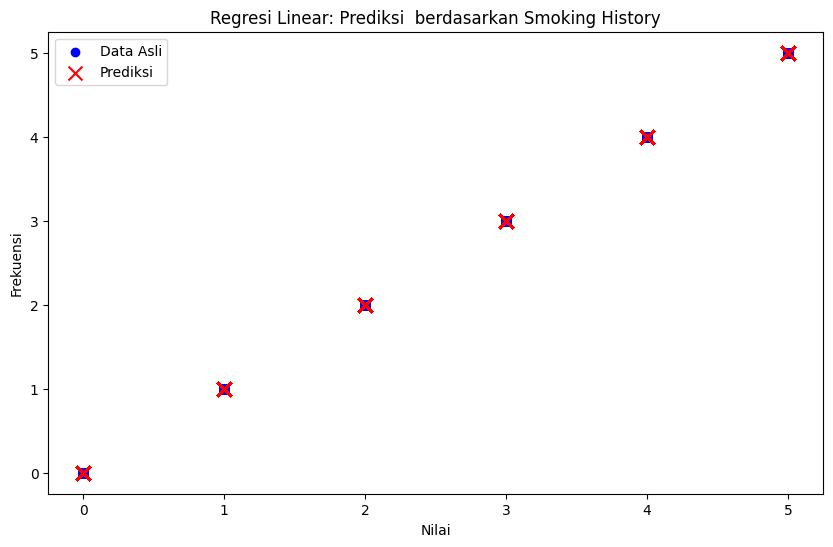

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['smoking_history'], y_test, color='blue', label='Data Asli')
plt.scatter(X_test['smoking_history'], y_pred, color='red', label='Prediksi', marker='x', s=100)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Regresi Linear: Prediksi  berdasarkan Smoking History')
plt.legend()
plt.show()

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df[['blood_glucose_level', 'bmi']]
y = df['age']

# Split data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model pada data pelatihan
model.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi performa model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Menghitung R2-Score
r2 = r2_score(y_test, y_pred)
print(f'R2-Score: {r2}')

MAE: 17.921385016471675
MSE: 450.64988457150275
RMSE: 21.22851583534522
R2-Score: 0.11686537798772834


## Unsupervised Learning
#### Melakukan implementasi metode K-Means

In [116]:
from sklearn.cluster import KMeans

x = df[['age','blood_glucose_level']]
kmeans = KMeans(n_clusters=10)

In [117]:
kmeans.fit(x)

/Users/hdcaps/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [118]:
labels = kmeans.labels_
df["cluster"] = labels
centroids = kmeans.cluster_centers_

### Menampilkan hasil cluster dengan 3 metrik evaluasi

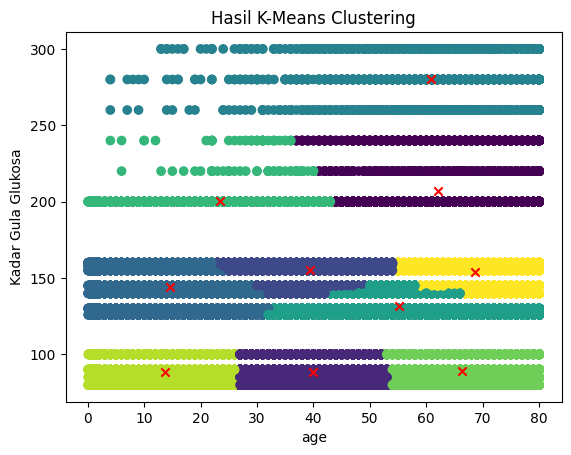

In [119]:
plt.scatter(x['age'], x['blood_glucose_level'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('age')
plt.ylabel('Kadar Gula Glukosa')
plt.title('Hasil K-Means Clustering')
plt.show()

## melakukan evaluasi cluster yang sudah diprediksi

In [120]:
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
silhouette_avg = silhouette_score(x, labels)
davies_bouldin = davies_bouldin_score(x, labels)
calinski_harabasz = calinski_harabasz_score(x, labels)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.41068313536832624
Davies-Bouldin Index: 0.7719445559641482
Calinski-Harabasz Index: 130743.01711738636


In [121]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score,v_measure_score

In [122]:
cross_tab = pd.crosstab(df["cluster"], df["age"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
age      0.08   0.16   0.24   0.32   0.40   0.48   0.56   0.64   0.72   0.80   \
cluster                                                                         
0            0      0      0      0      0      0      0      0      0      0   
1            0      0      0      0      0      0      0      0      0      0   
2            0      0      0      0      0      0      0      0      0      0   
3           24     36     53     58     42     51     62     66     68     64   
4            0      0      0      0      0      0      0      0      0      0   
5            0      0      0      0      0      0      0      0      0      0   
6            3      3      3      4      7      8      8      7      5      9   
7            0      0      0      0      0      0      0      0      0      0   
8            9     20     31     27     17     24     26     26     31     29   
9            0      0      0      0      0      0      0      0      0      0   

age      

In [123]:
ari = adjusted_rand_score(df["age"], labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
true_labels_num = df["age"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(df["age"], labels)
completeness = completeness_score(df["age"], labels)
v_measure = v_measure_score(df["age"], labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

/Users/hdcaps/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/hdcaps/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/hdcaps/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/hdcaps/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and

Adjusted Rand Index (ARI): 0.04
Normalized Mutual Information (NMI): 0.28
Homogeneity Score: 0.21
Completeness Score: 0.43
V-Measure Score: 0.28
